<h3>Random Forest Classifier - Respondent 1 </h3>

<h2>Pre-processing</h2>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming your data already has a 'screens' column

# Select only relevant columns
selected_features = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Confusion', 'Cognitive Task', 'Screens']
data = data[selected_features]

# Define the categories from the 'screens' column you want to include as features
selected_screens = ['Filter', 'Supporting material', 'Map', 'Statistics']

# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
all_columns.remove(target_column)
numeric_features = data[all_columns].select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Screens']

# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(categories=[selected_screens], handle_unknown='ignore', sparse_output=False))])

# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
y = data['Cognitive Task']
X = data.drop('Cognitive Task', axis=1)
X_preprocessed = preprocessor.fit_transform(X)

# Combine the numeric and transformed categorical feature names
all_feature_names = list(numeric_features) + selected_screens

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


<h2>Random Forest Classifier</h2>

Confusion Matrix:
 [[7151   44   53   26   23  113   78]
 [ 162 2649   75   14   15   73   69]
 [ 138   31 4979   12   23   39   88]
 [  12   12   35 1731    3    0  258]
 [ 148   20   37    3 1820   49   40]
 [ 309   50   44    1   20 4158    0]
 [  25    2    6   64    3    0 5047]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       0.90      0.95      0.93      7488
           Conclude       0.94      0.87      0.90      3057
            Explore       0.95      0.94      0.94      5310
              Focus       0.94      0.84      0.89      2051
Generate Hypothesis       0.95      0.86      0.90      2117
           Set Goal       0.94      0.91      0.92      4582
    Test Hypothesis       0.90      0.98      0.94      5147

           accuracy                           0.93     29752
          macro avg       0.93      0.91      0.92     29752
       weighted avg       0.93      0.93      0.93     29752


Accuracy Score

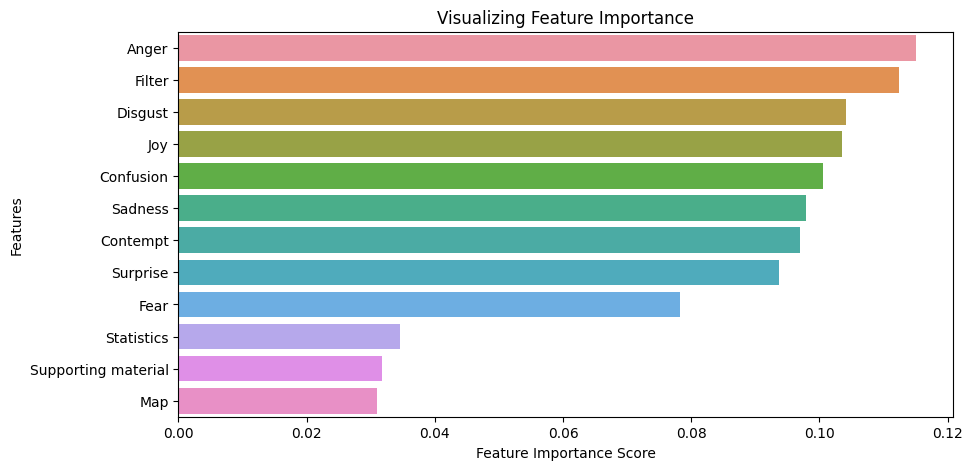

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot the feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance')
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_preprocessed, y, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Average cross-validation score: 0.42723432173695797
